## Problem Statement: 
Images are one of the major sources of data in the field of data science and AI. This field is making appropriate use of information that can be gathered through images by examining its features and details. We are trying to give you an exposure of how an end to end project is developed in this field. 
The idea behind this project is to build a deep learning-based Image Classification model on images that will be scraped from e-commerce portal. This is done to make the model more and more robust. 
This task is divided into two phases: Data Collection and Mode Building. 

## Model Building Phase:

After the data collection and preparation is done, you need to build an image classification model that will classify between these 3 categories mentioned above. You can play around with optimizers and learning rates for improving your model’s performance.

In [1]:
%load_ext nb_black
# %reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    Dropout,
    Activation,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from os import listdir
import os
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
Train_data_dir = r"C:\Users\tusha\Desktop\flip robo\project 12\1. final Image Scraping and Classification Project\images\train"
validation_data_dir = r"C:\Users\tusha\Desktop\flip robo\project 12\1. final Image Scraping and Classification Project\images\test"

<IPython.core.display.Javascript object>

In [4]:
# Number of classes in the training folder
file = os.listdir(
    r"C:/Users/tusha/Desktop/flip robo/project 12/1. final Image Scraping and Classification Project/images/train"
)
file

['Jeans (men)', 'Sarees (women)', 'Trousers (men)']

<IPython.core.display.Javascript object>

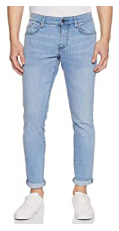

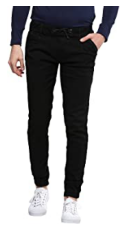

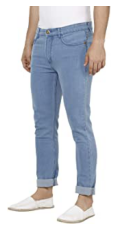

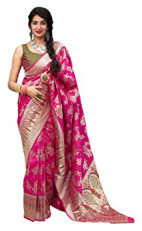

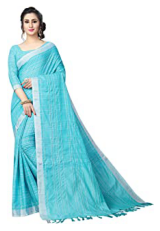

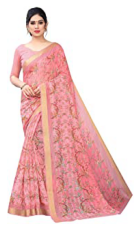

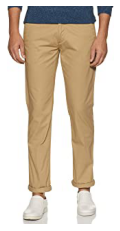

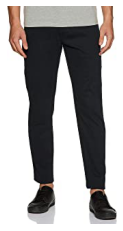

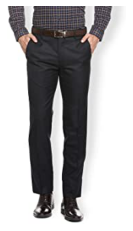

<IPython.core.display.Javascript object>

In [6]:
# Let's try to print some of the scrapped images from each category
import matplotlib.image as mpimg

Jeans_train = r"images/train/Jeans (men)"
Saree_train = r"images/train/Sarees (women)"
Trouser_train = r"images/train/Trousers (men)"


Dir_train = [Jeans_train, Saree_train, Trouser_train]
for dirs in Dir_train:
    k = listdir(dirs)
    for i in k[:3]:
        img = mpimg.imread("{}/{}".format(dirs, i))
        plt.imshow(img)
        plt.axis("off")
        plt.show()

In [7]:
# Defining Dimensions for the image to be input and then loading the images
input_shape = (576, 576, 3)
img_width = 576
img_height = 576
nb_train_samples = 179
nb_validation_samples = 20
batch_size = 8
epoch = 150

<IPython.core.display.Javascript object>

In [8]:
# Training Data Generator( Data Augmentation on Training Images)

Train_generator_augmented = ImageDataGenerator(
    rescale=1.0 / 255, zoom_range=0.2, rotation_range=30, horizontal_flip=True
)
Train_generator = Train_generator_augmented.flow_from_directory(
    Train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

# Validation Data Generator
Data_gen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = Data_gen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 833 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


<IPython.core.display.Javascript object>

In [9]:
# Creating the model
model = Sequential()

# First convolution layer
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation("softmax"))

print(model.summary())

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 574, 574, 32)      896       
                                                                 
 activation (Activation)     (None, 574, 574, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 287, 287, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 287, 287, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 285, 285, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 285, 285, 32)      0         
                                                        

<IPython.core.display.Javascript object>

In [10]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=30)
MC = ModelCheckpoint(
    "best.h5", monitor="val_accuracy", mode="max", verbose=1, save_best_only=True
)

<IPython.core.display.Javascript object>

In [11]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator,
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    steps_per_epoch=nb_train_samples // batch_size,
    callbacks=[ES, MC],
)

Epoch 1/150
22/22 [==============================] - ETA: 0s - loss: 2.0390 - accuracy: 0.3254
Epoch 00001: val_accuracy improved from -inf to 0.25000, saving model to best.h5
22/22 [==============================] - 65s 3s/step - loss: 2.0390 - accuracy: 0.3254 - val_loss: 1.0994 - val_accuracy: 0.2500
Epoch 2/150
22/22 [==============================] - ETA: 0s - loss: 1.0936 - accuracy: 0.4260
Epoch 00002: val_accuracy improved from 0.25000 to 0.37500, saving model to best.h5
22/22 [==============================] - 64s 3s/step - loss: 1.0936 - accuracy: 0.4260 - val_loss: 1.0974 - val_accuracy: 0.3750
Epoch 3/150
22/22 [==============================] - ETA: 0s - loss: 1.1040 - accuracy: 0.3295
Epoch 00003: val_accuracy improved from 0.37500 to 0.56250, saving model to best.h5
22/22 [==============================] - 66s 3s/step - loss: 1.1040 - accuracy: 0.3295 - val_loss: 1.0895 - val_accuracy: 0.5625
Epoch 4/150
22/22 [==============================] - ETA: 0s - loss: 1.0977 - a

Epoch 30/150
22/22 [==============================] - ETA: 0s - loss: 0.4798 - accuracy: 0.7898
Epoch 00030: val_accuracy did not improve from 0.87500
22/22 [==============================] - 76s 3s/step - loss: 0.4798 - accuracy: 0.7898 - val_loss: 0.6093 - val_accuracy: 0.6875
Epoch 31/150
22/22 [==============================] - ETA: 0s - loss: 0.4632 - accuracy: 0.8239
Epoch 00031: val_accuracy did not improve from 0.87500
22/22 [==============================] - 77s 3s/step - loss: 0.4632 - accuracy: 0.8239 - val_loss: 0.3102 - val_accuracy: 0.8125
Epoch 32/150
22/22 [==============================] - ETA: 0s - loss: 0.4715 - accuracy: 0.7727
Epoch 00032: val_accuracy did not improve from 0.87500
22/22 [==============================] - 65s 3s/step - loss: 0.4715 - accuracy: 0.7727 - val_loss: 0.9441 - val_accuracy: 0.8750
Epoch 33/150
22/22 [==============================] - ETA: 0s - loss: 0.4864 - accuracy: 0.7515
Epoch 00033: val_accuracy did not improve from 0.87500
22/22 [==

22/22 [==============================] - ETA: 0s - loss: 0.3955 - accuracy: 0.8295
Epoch 00059: val_accuracy did not improve from 0.93750
22/22 [==============================] - 102s 5s/step - loss: 0.3955 - accuracy: 0.8295 - val_loss: 0.3569 - val_accuracy: 0.8125
Epoch 60/150
22/22 [==============================] - ETA: 0s - loss: 0.4586 - accuracy: 0.7784
Epoch 00060: val_accuracy did not improve from 0.93750
22/22 [==============================] - 100s 4s/step - loss: 0.4586 - accuracy: 0.7784 - val_loss: 0.2722 - val_accuracy: 0.8125
Epoch 61/150
22/22 [==============================] - ETA: 0s - loss: 0.4272 - accuracy: 0.8125
Epoch 00061: val_accuracy did not improve from 0.93750
22/22 [==============================] - 101s 5s/step - loss: 0.4272 - accuracy: 0.8125 - val_loss: 0.5023 - val_accuracy: 0.6250
Epoch 62/150
22/22 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.7692
Epoch 00062: val_accuracy did not improve from 0.93750
22/22 [============

22/22 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.7929
Epoch 00088: val_accuracy did not improve from 0.93750
22/22 [==============================] - 68s 3s/step - loss: 0.3683 - accuracy: 0.7929 - val_loss: 0.1883 - val_accuracy: 0.9375
Epoch 89/150
22/22 [==============================] - ETA: 0s - loss: 0.4051 - accuracy: 0.8693
Epoch 00089: val_accuracy did not improve from 0.93750
22/22 [==============================] - 70s 3s/step - loss: 0.4051 - accuracy: 0.8693 - val_loss: 0.2911 - val_accuracy: 0.7500
Epoch 90/150
22/22 [==============================] - ETA: 0s - loss: 0.3115 - accuracy: 0.8693
Epoch 00090: val_accuracy did not improve from 0.93750
22/22 [==============================] - 72s 3s/step - loss: 0.3115 - accuracy: 0.8693 - val_loss: 0.4437 - val_accuracy: 0.8125
Epoch 91/150
22/22 [==============================] - ETA: 0s - loss: 0.3991 - accuracy: 0.8125
Epoch 00091: val_accuracy did not improve from 0.93750
22/22 [===============

22/22 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.8693
Epoch 00117: val_accuracy did not improve from 1.00000
22/22 [==============================] - 72s 3s/step - loss: 0.2959 - accuracy: 0.8693 - val_loss: 0.8728 - val_accuracy: 0.7500
Epoch 118/150
22/22 [==============================] - ETA: 0s - loss: 0.3690 - accuracy: 0.8295
Epoch 00118: val_accuracy did not improve from 1.00000
22/22 [==============================] - 70s 3s/step - loss: 0.3690 - accuracy: 0.8295 - val_loss: 0.3534 - val_accuracy: 0.8750
Epoch 119/150
22/22 [==============================] - ETA: 0s - loss: 0.4092 - accuracy: 0.8047
Epoch 00119: val_accuracy did not improve from 1.00000
22/22 [==============================] - 66s 3s/step - loss: 0.4092 - accuracy: 0.8047 - val_loss: 0.5250 - val_accuracy: 0.8125
Epoch 120/150
22/22 [==============================] - ETA: 0s - loss: 0.3196 - accuracy: 0.8125
Epoch 00120: val_accuracy did not improve from 1.00000
22/22 [============

<IPython.core.display.Javascript object>

In [20]:
# Model Evaluation
evl = model.evaluate(validation_generator, steps=1)
print("Test Loss", evl[0])
print("Test Accuracy", evl[1])

1/1 [==============================] - 1s 583ms/step - loss: 0.3177 - accuracy: 0.8750
Test Loss 0.3177236020565033
Test Accuracy 0.875


<IPython.core.display.Javascript object>

In [21]:
model.save("result.h5")

<IPython.core.display.Javascript object>

In [22]:
model = load_model("result.h5")

<IPython.core.display.Javascript object>

Input Image is: img276.jpeg


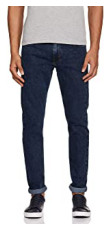

Predicted Label is: trouser

Input Image is: img277.jpeg


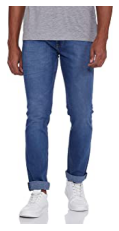

Predicted Label is: jeans

Input Image is: img278.jpeg


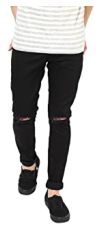

Predicted Label is: jeans

Input Image is: img279.jpeg


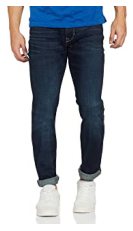

Predicted Label is: trouser

Input Image is: img280.jpeg


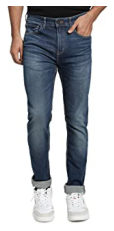

Predicted Label is: trouser

Input Image is: img281.jpeg


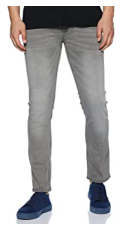

Predicted Label is: trouser

Input Image is: img282.jpeg


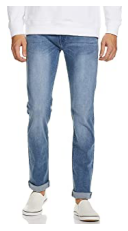

Predicted Label is: jeans

Input Image is: img283.jpeg


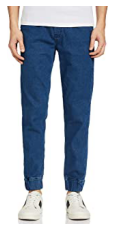

Predicted Label is: jeans

Input Image is: img284.jpeg


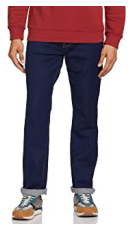

Predicted Label is: trouser

Input Image is: img285.jpeg


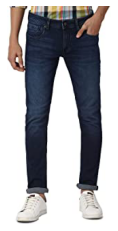

Predicted Label is: trouser

Input Image is: img286.jpeg


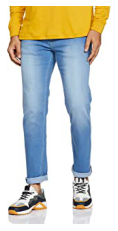

Predicted Label is: jeans

Input Image is: img287.jpeg


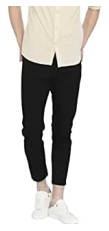

Predicted Label is: trouser

Input Image is: img288.jpeg


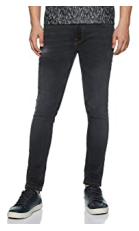

Predicted Label is: trouser

Input Image is: img289.jpeg


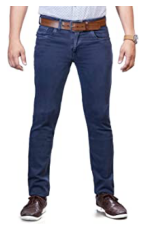

Predicted Label is: trouser

Input Image is: img290.jpeg


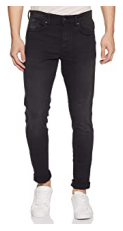

Predicted Label is: trouser

Input Image is: img291.jpeg


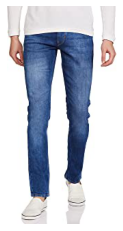

Predicted Label is: jeans

Input Image is: img292.jpeg


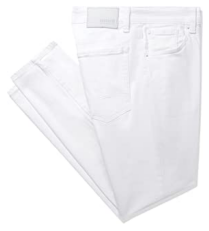

Predicted Label is: trouser

Input Image is: img293.jpeg


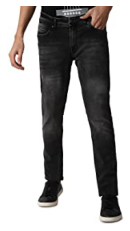

Predicted Label is: trouser

Input Image is: img294.jpeg


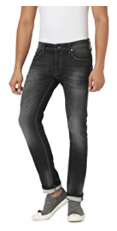

Predicted Label is: trouser

Input Image is: img295.jpeg


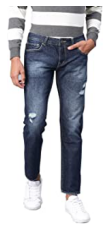

Predicted Label is: trouser

Input Image is: img296.jpeg


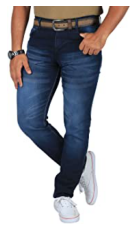

Predicted Label is: jeans

Input Image is: img297.jpeg


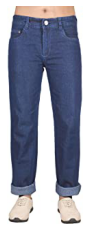

Predicted Label is: trouser

Input Image is: img298.jpeg


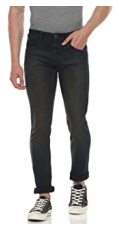

Predicted Label is: trouser

Input Image is: img299.jpeg


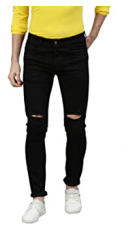

Predicted Label is: jeans

Input Image is: img300.jpeg


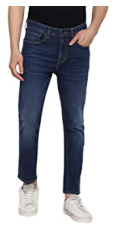

Predicted Label is: trouser

Input Image is: img276.jpeg


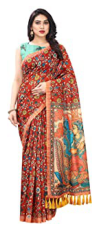

Predicted Label is: sarees

Input Image is: img277.jpeg


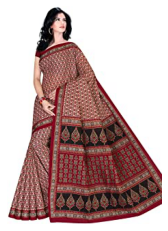

Predicted Label is: sarees

Input Image is: img278.jpeg


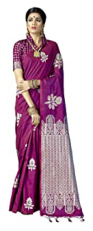

Predicted Label is: jeans

Input Image is: img279.jpeg


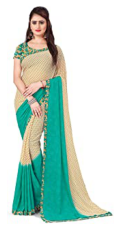

Predicted Label is: sarees

Input Image is: img280.jpeg


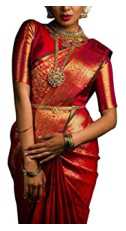

Predicted Label is: sarees

Input Image is: img281.jpeg


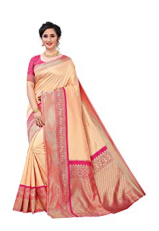

Predicted Label is: sarees

Input Image is: img282.jpeg


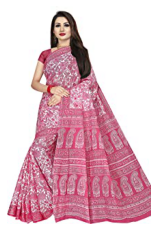

Predicted Label is: sarees

Input Image is: img283.jpeg


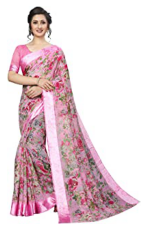

Predicted Label is: trouser

Input Image is: img284.jpeg


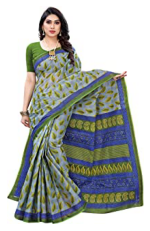

Predicted Label is: trouser

Input Image is: img285.jpeg


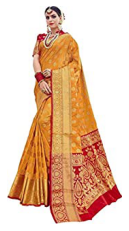

Predicted Label is: sarees

Input Image is: img286.jpeg


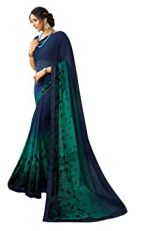

Predicted Label is: sarees

Input Image is: img287.jpeg


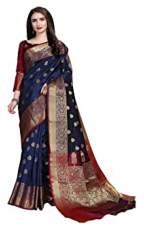

Predicted Label is: sarees

Input Image is: img288.jpeg


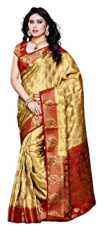

Predicted Label is: sarees

Input Image is: img289.jpeg


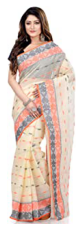

Predicted Label is: trouser

Input Image is: img290.jpeg


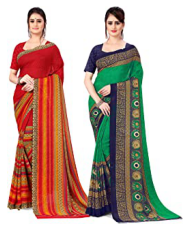

Predicted Label is: sarees

Input Image is: img291.jpeg


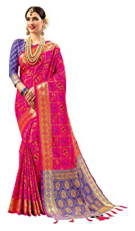

Predicted Label is: sarees

Input Image is: img292.jpeg


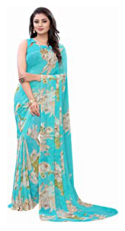

Predicted Label is: sarees

Input Image is: img293.jpeg


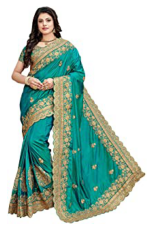

Predicted Label is: sarees

Input Image is: img294.jpeg


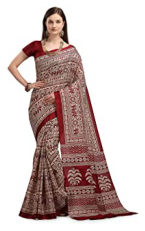

Predicted Label is: trouser

Input Image is: img295.jpeg


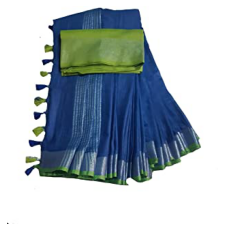

Predicted Label is: jeans

Input Image is: img296.jpeg


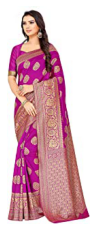

Predicted Label is: sarees

Input Image is: img297.jpeg


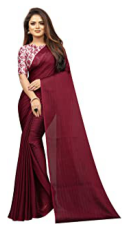

Predicted Label is: sarees

Input Image is: img298.jpeg


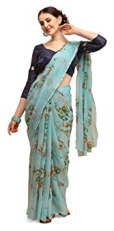

Predicted Label is: sarees

Input Image is: img299.jpeg


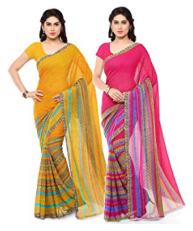

Predicted Label is: trouser

Input Image is: img300.jpeg


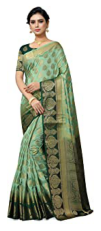

Predicted Label is: sarees

Input Image is: img276.jpeg


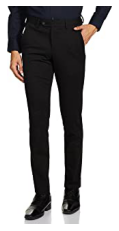

Predicted Label is: trouser

Input Image is: img277.jpeg


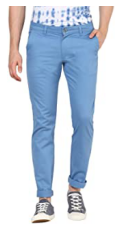

Predicted Label is: trouser

Input Image is: img278.jpeg


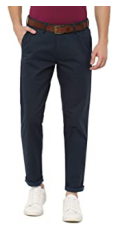

Predicted Label is: trouser

Input Image is: img279.jpeg


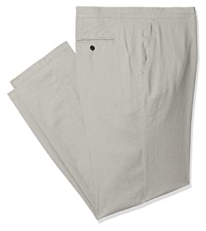

Predicted Label is: trouser

Input Image is: img280.jpeg


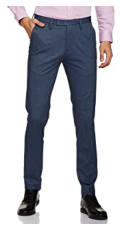

Predicted Label is: trouser

Input Image is: img281.jpeg


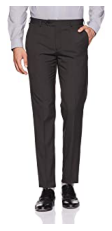

Predicted Label is: trouser

Input Image is: img282.jpeg


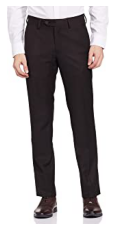

Predicted Label is: trouser

Input Image is: img283.jpeg


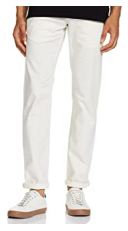

Predicted Label is: trouser

Input Image is: img284.jpeg


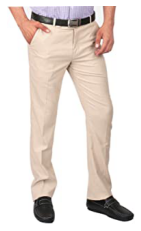

Predicted Label is: trouser

Input Image is: img285.jpeg


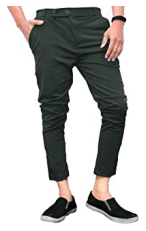

Predicted Label is: trouser

Input Image is: img286.jpeg


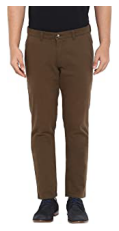

Predicted Label is: trouser

Input Image is: img287.jpeg


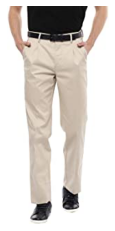

Predicted Label is: sarees

Input Image is: img288.jpeg


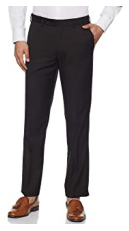

Predicted Label is: trouser

Input Image is: img289.jpeg


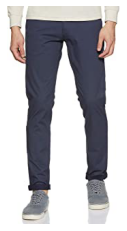

Predicted Label is: trouser

Input Image is: img290.jpeg


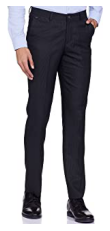

Predicted Label is: trouser

Input Image is: img291.jpeg


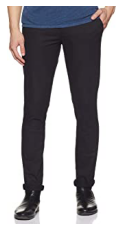

Predicted Label is: trouser

Input Image is: img292.jpeg


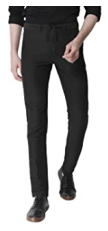

Predicted Label is: trouser

Input Image is: img293.jpeg


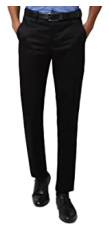

Predicted Label is: trouser

Input Image is: img294.jpeg


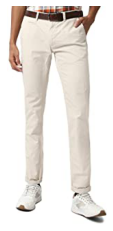

Predicted Label is: jeans

Input Image is: img295.jpeg


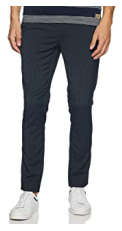

Predicted Label is: trouser

Input Image is: img296.jpeg


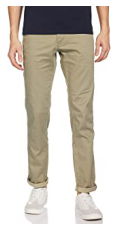

Predicted Label is: trouser

Input Image is: img297.jpeg


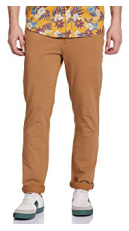

Predicted Label is: trouser

Input Image is: img298.jpeg


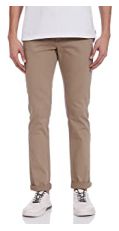

Predicted Label is: jeans

Input Image is: img299.jpeg


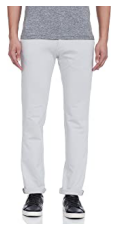

Predicted Label is: trouser

Input Image is: img300.jpeg


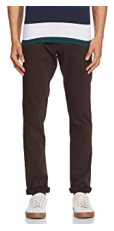

Predicted Label is: trouser



<IPython.core.display.Javascript object>

In [23]:
# Predicted samples of the test images
test_jeans = r"images/Test/Jeans (men)"
test_Saree = r"images/Test/Sarees (women)"
test_trouser = r"images/Test/Trousers (men)"


Predicted_class = []
classes = [test_jeans, test_Saree, test_trouser]
for test_dir in classes:
    for i in listdir(test_dir):
        print("Input Image is:", i)
        img = image.load_img("{}/{}".format(test_dir, i))
        test_image = image.load_img("{}/{}".format(test_dir, i), target_size=(576, 576))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis("off")
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = model.predict(test_image)
        final = np.argmax(result, axis=1)[0]
        if final == 0:
            print("Predicted Label is: jeans\n")
            Predicted_class.append("Jeans (men)")
        elif final == 1:
            print("Predicted Label is: sarees\n")
            Predicted_class.append("Sarees (women)")
        elif final == 2:
            print("Predicted Label is: trouser\n")
            Predicted_class.append("Trousers (men)")

### After complete analysis we get the accuracy of 87.5%